In [208]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [209]:
train_dir='/kaggle/input/seats-dataset/Seats'

In [210]:
image_size = (224,224)
batch_size = 32

In [211]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 222 images belonging to 2 classes.


In [212]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 38 images belonging to 2 classes.


In [213]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(2, activation='softmax')(x)

In [214]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 20
h=model.fit(
       train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20


W0000 00:00:1710091672.901248     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/6 ━━━━━━━━━━━━━━━━━━━━ 7:33 91s/step - accuracy: 0.6667 - loss: 1.3422

W0000 00:00:1710091675.772424     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.5939 - loss: 1.3354

W0000 00:00:1710091683.063793     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5956 - loss: 1.3320 - val_accuracy: 0.7812 - val_loss: 1.2449 - learning_rate: 1.0000e-05
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7812 - loss: 1.2182 - val_accuracy: 0.8333 - val_loss: 1.2766 - learning_rate: 1.0000e-05
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 520ms/step - accuracy: 0.8509 - loss: 1.1517 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.6250 - loss: 1.2283 - val_accuracy: 0.9062 - val_loss: 1.0490 - learning_rate: 1.0000e-05
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 529ms/step - accuracy: 0.9016 - loss: 0.9905 - val_accuracy: 0.8333 - val_loss: 0.9455 - learning_rate: 1.0000e-05
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.9811 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 859ms/step - accuracy: 0.9189 - los

In [246]:
from tensorflow.keras.preprocessing.image import load_img
image1 = load_img('/kaggle/input/seats-dataset/Seats/Damaged seats/download (33).jpeg', target_size=(224,224,3))

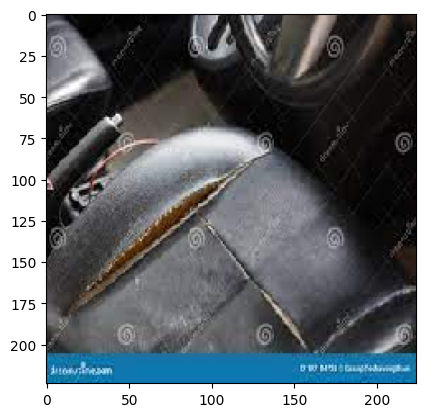

In [247]:
import matplotlib.pyplot as plt
plt.imshow(image1)


In [248]:
from tensorflow.keras.preprocessing.image import img_to_array
image1 = img_to_array(image1)
#image=image/255

In [249]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image1)

In [250]:
import numpy as np
image1=np.expand_dims(image1,axis=0)
pred = model.predict(image1)
pred_labels=np.argmax(pred,axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [251]:
pred

array([[1.9124464e-09, 1.0000000e+00]], dtype=float32)

In [252]:
d={0:'DamagedSeat',1:'Not_Damaged_Seats'}
for key in d.keys():
    if pred_labels[0]==key:
       print("validating whether damgedseat or not...........Result:",d[key])
       print("damageseat detection complete")

validating whether damgedseat or not...........Result: Not_Damaged_Seats
damageseat detection complete


In [222]:
print(pred)

[[0. 1.]]


In [223]:
pred_labels

array([1])

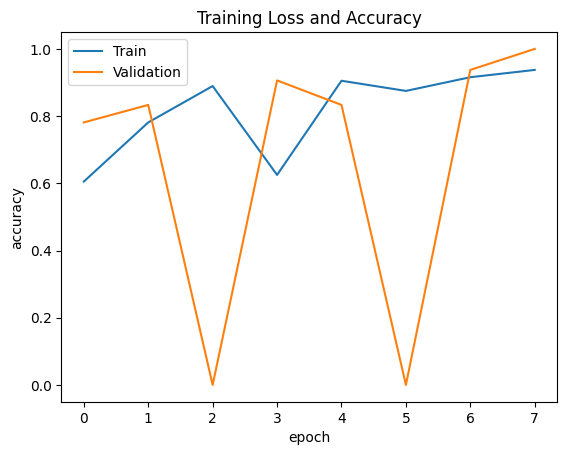

In [224]:
plt.plot(h.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_accuracy'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

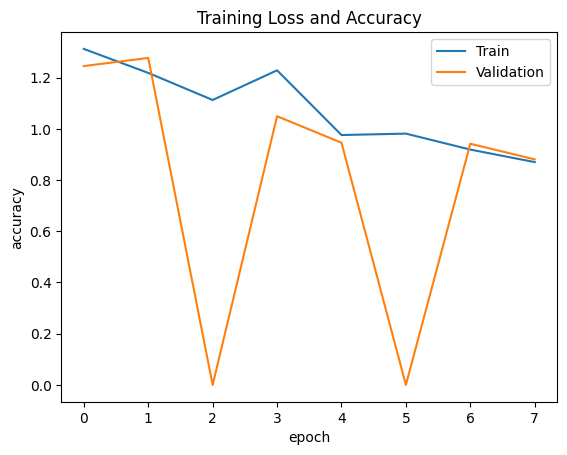

In [225]:
plt.plot(h.history['loss']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

In [226]:
model.save('/kaggle/working/seats_modified.h5')